<a href="https://colab.research.google.com/github/SyedT1/MLZoomcamp_2023/blob/main/homeworks/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'


In [2]:
!wget $url

--2023-09-26 12:59:25--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.3’

housing.csv.3       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-26 12:59:25 (19.8 MB/s) - ‘housing.csv.3’ saved [1423529/1423529]



In [3]:
cols = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('housing.csv')

In [5]:
df_n = df[cols].copy()

# Q1. There's one feature with missing values. What is it?
# A: total_bedrooms

In [6]:
df_n.isna().sum() > 0

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

# Q2. What's the median (50% percentile) for variable 'population'?
# A: 1195 (my answer is 1166 which is quite close)

In [7]:
df_n['population'].fillna(0).median()

1166.0

<Axes: ylabel='Count'>

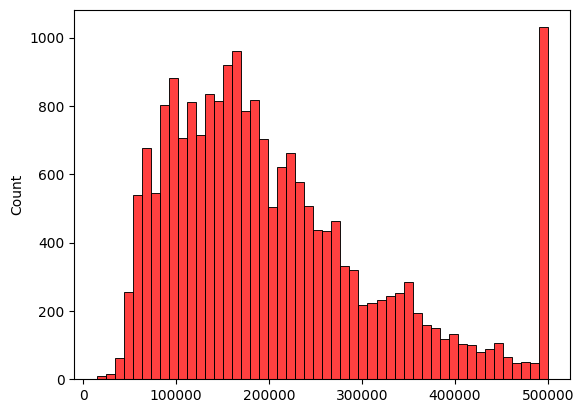

In [8]:

d = df_n['median_house_value'].values
import seaborn as sb
sb.histplot(d,color='red',bins=50)

In [9]:
df_n.head(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [10]:
from sklearn.utils import shuffle
import random
random.seed(42)
shuffled_df = df_n.sample(frac=1, random_state=42)
shuffled_df.reset_index(drop=True, inplace=True)
shuffled_df.head(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [11]:
n = int(len(shuffled_df) * 0.2)

In [12]:
shuffled_df['median_house_value_log'] = shuffled_df['median_house_value'].apply(lambda x:np.log1p(x))

In [13]:
df_train = shuffled_df[:n]
df_val = shuffled_df[n:n+n]
df_test = shuffled_df[n+n:]

In [14]:
shuffled_df.isna().sum()

latitude                    0
longitude                   0
housing_median_age          0
total_rooms                 0
total_bedrooms            207
population                  0
households                  0
median_income               0
median_house_value          0
median_house_value_log      0
dtype: int64

In [15]:
mean_of_num_of_bedrooms = df_train['total_bedrooms'].fillna(0).mean()

<Axes: ylabel='Count'>

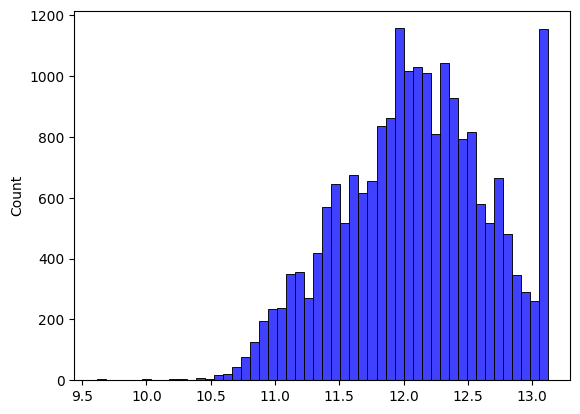

In [16]:
import seaborn as sb
sb.histplot(shuffled_df['median_house_value_log'].values,color='blue',bins=50)

# Q3 : Which option gives better RMSE?
# A: Both are equally good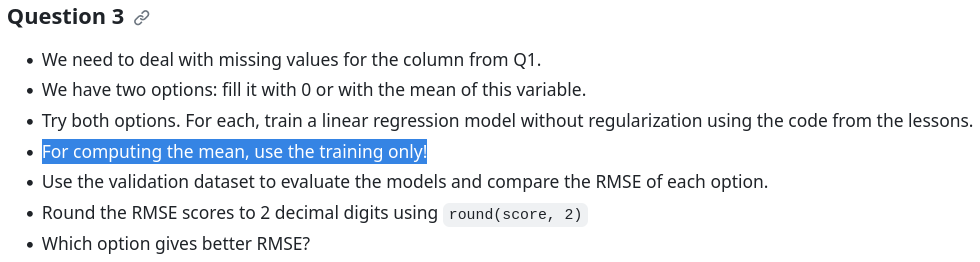

In [17]:
y_train = df_train['median_house_value_log'].values
y_val = df_val['median_house_value_log'].values
y_test = df_test['median_house_value_log'].values

In [18]:
y = shuffled_df['median_house_value_log'].values

In [19]:
def prepare_X(df,mean_of_num_of_bedrooms=-1):
  df = df.copy()
  cols = ['housing_median_age','median_income','total_bedrooms',
  'total_rooms']
  if mean_of_num_of_bedrooms >= 0:
    return df[cols].fillna(mean_of_num_of_bedrooms).values
  else:
    return df[cols].fillna(0).values


In [20]:
df_train.head(10)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_log
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,10.772708
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,10.732061
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,13.122367
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,12.295003
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,12.535380
5,34.08,-117.61,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0,11.974777
6,33.89,-118.02,36.0,1375.0,NaN,670.0,221.0,5.0839,198200.0,12.197037
7,33.92,-118.08,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,11.967187
8,37.39,-122.08,4.0,2292.0,NaN,1050.0,584.0,4.8036,340000.0,12.736704
9,34.18,-118.23,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,13.009421


<Axes: ylabel='Count'>

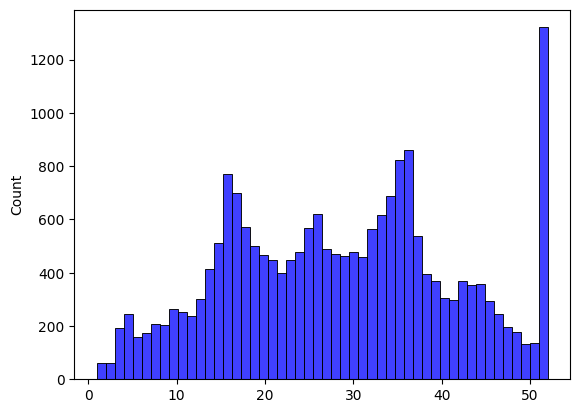

In [21]:
import seaborn as sb
sb.histplot(df['housing_median_age'].values,color='blue',bins=50)

<Axes: ylabel='Count'>

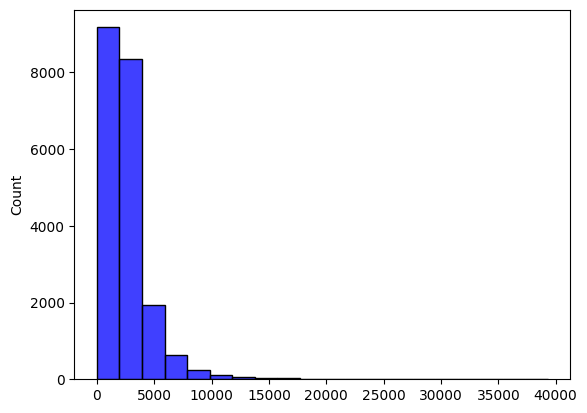

In [22]:
import seaborn as sb
sb.histplot(df['total_rooms'].values,color='blue',bins=20)

<Axes: ylabel='Count'>

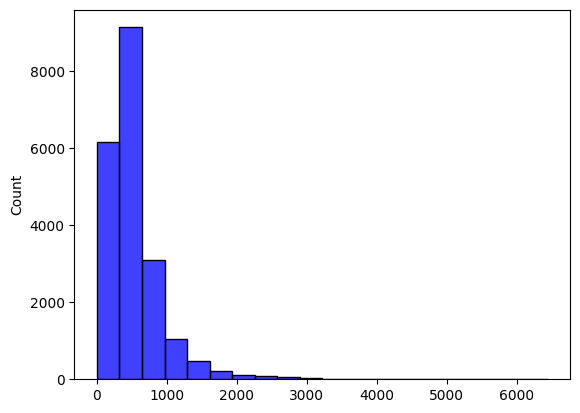

In [23]:
import seaborn as sb
sb.histplot(df['total_bedrooms'].values,color='blue',bins=20)

In [24]:
X_train = prepare_X(df_train,mean_of_num_of_bedrooms)

In [25]:
def train_linear_regression(X,y):
    X = np.column_stack([np.ones(X.shape[0]),X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    res = XTX_inv.dot(X.T).dot(y)
    return res[0],res[1:]


In [26]:
w0,w = train_linear_regression(X_train,y_train)

In [27]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [28]:
def rme(y,y_pred):
    s = y - y_pred
    sq_s = s ** 2
    mse = sq_s.mean()
    return np.sqrt(mse)

In [29]:
rme(y_val,y_pred)

0.4045293268888958

In [30]:
round(rme(y_val,y_pred),2)

0.4

In [31]:
X_val = prepare_X(df_val,mean_of_num_of_bedrooms=-1)

In [32]:
y_pred = w0 + X_val.dot(w)


In [33]:
round(rme(y_val,y_pred),2)

0.4

# Average prediction (See graph)

<Axes: ylabel='Count'>

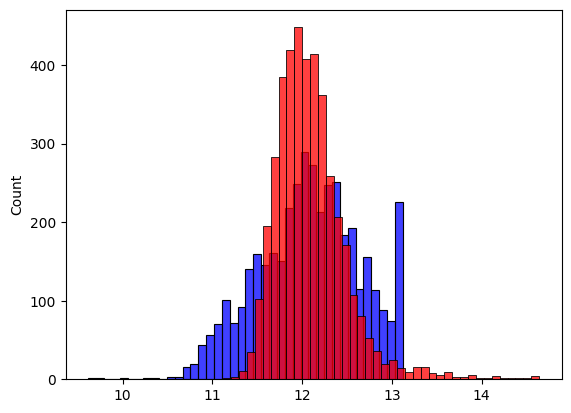

In [34]:
sb.histplot(df_train['median_house_value_log'].values,color='blue',bins=40)
sb.histplot(y_pred,color='red',bins=40)

In [35]:
def train_linear_regression_reg(X,y,r = 0.001):
    X = np.column_stack([np.ones(X.shape[0]),X])
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0]) * r
    XTX_inv = np.linalg.inv(XTX)
    res = XTX_inv.dot(X.T).dot(y)
    return res[0],res[1:]


In [36]:
def prepare_XW(df,mean_of_num_of_bedrooms=-1):
  df = df.copy()
  cols = ['housing_median_age','median_income','total_bedrooms',
  'total_rooms','population','households']
  if mean_of_num_of_bedrooms >= 0:
    return df[cols].fillna(mean_of_num_of_bedrooms).values
  else:
    return df[cols].fillna(0).values


In [37]:
X_val = prepare_XW(df_val,mean_of_num_of_bedrooms=-1)
X_train = prepare_XW(df_train,mean_of_num_of_bedrooms=-1)

# Q4: Which r gives the best RMSE?
# A : 0
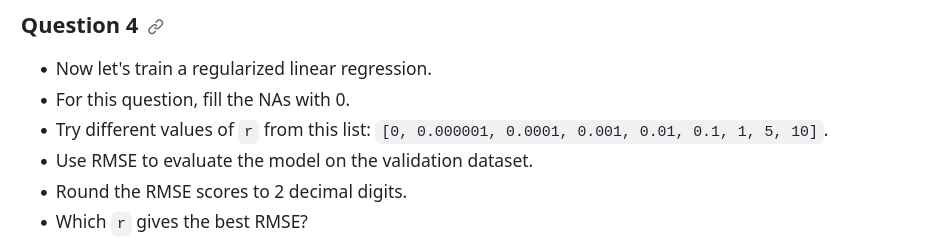

In [38]:
scores = []
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  w0,w = train_linear_regression_reg(X_train,y_train,r)
  y_pred = w0 +  X_val.dot(w)
  rme_v = rme(y_val,y_pred)
  scores.append(rme_v)
  print(f'for value of {r}, rmse is {rme_v:.2f}')

for value of 0, rmse is 0.40
for value of 1e-06, rmse is 0.40
for value of 0.0001, rmse is 0.40
for value of 0.001, rmse is 0.40
for value of 0.01, rmse is 0.40
for value of 0.1, rmse is 0.40
for value of 1, rmse is 0.40
for value of 5, rmse is 0.40
for value of 10, rmse is 0.41


In [40]:
from sklearn.model_selection import train_test_split
seed_values,scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],[]
for seed in seed_values:
    df_T, df_Temp, y_train, y_temp = train_test_split(shuffled_df, y, test_size=0.4, random_state=seed)
    df_v, df_t, y_val, y_test = train_test_split(df_Temp, y_temp, test_size=0.5, random_state=seed)
    x_Train = prepare_XW(df_T)
    x_Valid = prepare_XW(df_v)
    w0,w = train_linear_regression_reg(x_Train,y_train)
    y_pred = w0 + x_Valid.dot(w)
    rme_result = rme(y_val,y_pred)
    print(rme_result)
    scores.append(rme_result)

round(np.array(scores).std(),3)

0.3923488279348894
0.39685680717947025
0.3897174401376421
0.3961100791818404
0.40181928157364344
0.39874024733506214
0.39449080473257825
0.3967578635658757
0.3872736660599471
0.3953965585732918


0.004

# Q5: What's the value of std?
# A : 0.005 (ans = 0.004 almost close to 0.005)

# Q6 : What's the RMSE on the test dataset?
# A : 0.4075
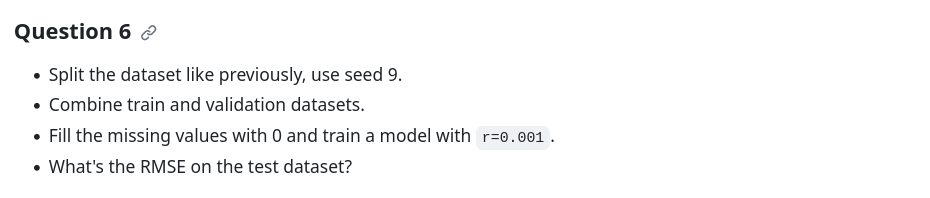

In [42]:
df_T, df_Temp, y_train, y_temp = train_test_split(shuffled_df, y, test_size=0.4, random_state=9)
df_v, df_t, y_val, y_test = train_test_split(df_Temp, y_temp, test_size=0.5, random_state=9)
x_Train = prepare_XW(df_T,mean_of_num_of_bedrooms =-1)
x_test = prepare_XW(df_t,mean_of_num_of_bedrooms=-1)
w0,w = train_linear_regression_reg(x_Train,y_train,0.001)
y_pred = w0 + x_test.dot(w)
rme_result = rme(y_test,y_pred)
print(rme_result)

0.4075995206510059
